# Unsupervised Learning
Closely related to pattern recognition, Unsupervised Learning is about analyzing data and looking for patterns. It is an extremely powerful tool for identifying structure in data. This course focuses on how you can use Unsupervised Learning approaches — including randomized optimization, clustering, and feature selection and transformation — to find structure in unlabeled data.

 # OBJECTIVE:
 ### IN this problem we are doing customer segmentation based on the income and spending scores

# FEATURES DETAILS:
* GENDER              - is the customer male or female 
* AGE                 - age of the customer
* Annual Income (k$)  - income of the customer annualy
* Sepending scores    - tells how the customer spends often
    

## Table of Content
* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
        
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Building Model__

### step 1:  importing required libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")

### step 2:Data Inspection
    

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Step 3 :Exploratory Data Analysis
    

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

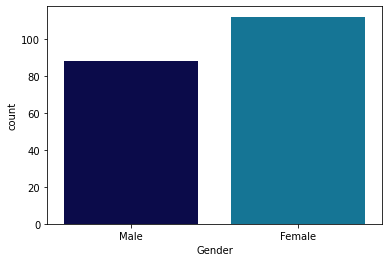

In [4]:
sns.countplot(df["Gender"],palette='ocean')

#### female customer are more then male 

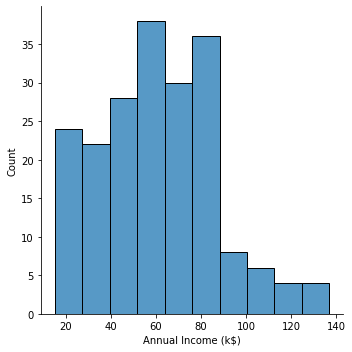

In [5]:
sns.displot(df["Annual Income (k$)"],palette='summer')

#### most customers anuual Income is between $50k to $60k

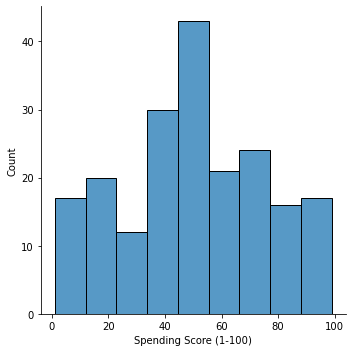

In [6]:
sns.displot(df["Spending Score (1-100)"])

#### most of the customers spending score's are in 50 

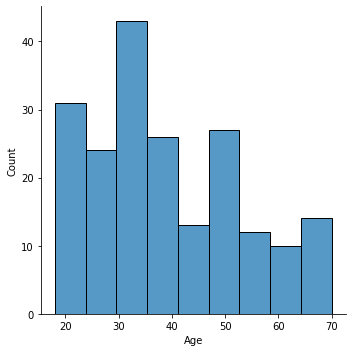

In [7]:
sns.displot(df["Age"],palette='summer')

#### 30 to 40 years aged customers are more

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

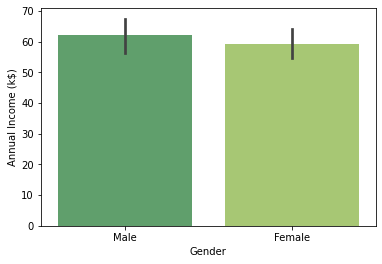

In [8]:
sns.barplot(y=df["Annual Income (k$)"],x=df["Gender"],palette='summer')

#### males earn more money then female

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

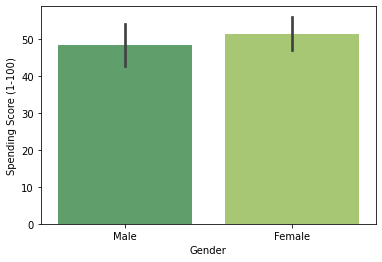

In [9]:
sns.barplot(y=df["Spending Score (1-100)"],x=df["Gender"],palette='summer')

#### Females spend more then male 

In [10]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [11]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
df_copy=df

In [13]:
df_copy.drop(["Gender"],axis=1,inplace=True)

# step 4: Model Building

# KMeans_model

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

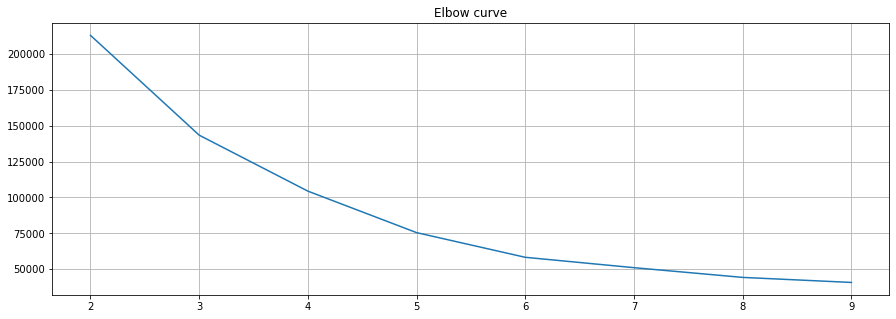

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_copy)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

In [15]:
# the k value is 5 from the above elbow graph so no. of clusters are 5

In [16]:
kmeans = KMeans(n_clusters=5, random_state= 42)  
y_predict= kmeans.fit_predict(df_copy)
centroids = kmeans.cluster_centers_

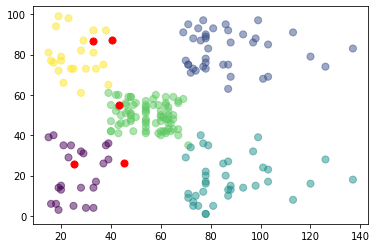

In [17]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [18]:
l=pd.DataFrame({"income":df["Annual Income (k$)"],"spending_score":df["Spending Score (1-100)"],"labels":kmeans.labels_})

In [19]:
l

,income,spending_score,labels
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


# hierarchical clustering
Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

In [20]:
x = df_copy.iloc[:, [1, 2]].values  

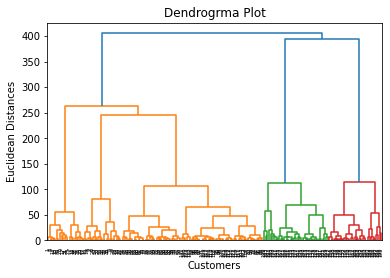

In [21]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()  

In the above diagram, we have shown the vertical distances that are not cutting their horizontal bars. As we can visualize, the 4th distance is looking the maximum, so according to this, the number of clusters will be 5(the vertical lines in this range). We can also take the 2nd number as it approximately equals the 4th distance, but we will consider the 5 clusters because the same we calculated in the K-means algorithm.

So, the optimal number of clusters will be 5, and we will train the model in the next step, using the same.

In [22]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

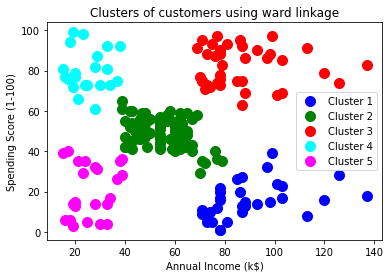

In [23]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers using ward linkage')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [24]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
y_pred= hc.fit_predict(x)  

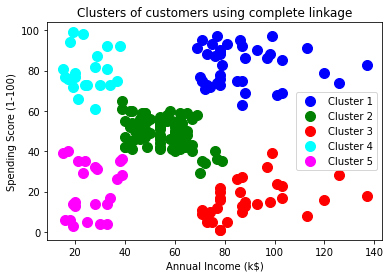

In [25]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers using complete linkage')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [26]:
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
y_pred= hc.fit_predict(x)  

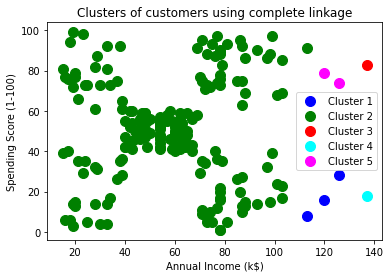

In [27]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers using complete linkage')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [28]:
# here the dezired clusters are not forming 

In [29]:
algo=pd.DataFrame({"income":df["Annual Income (k$)"],"spending_score":df["Spending Score (1-100)"],"labels":hc.labels_})

In [30]:
algo

,income,spending_score,labels
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
...,...,...,...
195,120,79,4
196,126,28,0
197,126,74,4
198,137,18,3


# DBSCAN
Density-based clustering
Partition-based and hierarchical clustering techniques are highly efficient with normal shaped clusters. However, when it comes to arbitrary shaped clusters or detecting outliers, density-based techniques are more efficient.

* Does not require to specify number of clusters beforehand.
* Performs well with arbitrary shapes clusters.
* DBSCAN is robust to outliers and able to detect the outliers.

In [32]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=12.5, min_samples=20)
db.fit(x)

DBSCAN(eps=12.5, min_samples=20)

eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors 
if the distance between them are less than or equal to eps.
minPts: Minimum number of data points to define a cluster.


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

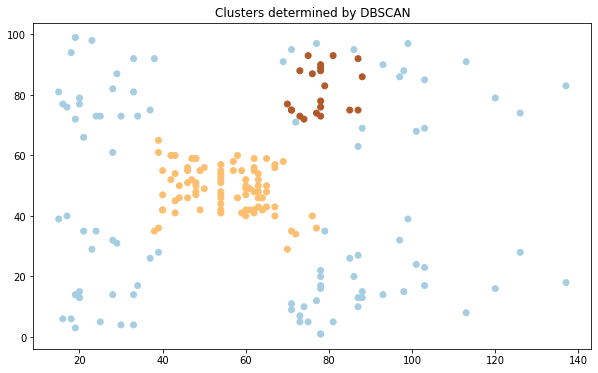

In [33]:
y_pred = db.fit_predict(x)
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

# compareing all the three clusters we find  hierarchical clustering is giving good clusters